CA1 Data Analysis and Visualization

I create a composite indicator to evaluate chess openings based on 4 index: effectiveness, popularity, complexity and improvement. This indicator will integrate various metrics such as win rates, frequency of use to offer a comprehensive assessment of each opening.

I will use the following dataset: (Available at: https://www.kaggle.com/datasets/alexandrelemercier/all-chess-openings)

In [2764]:
import pandas as pd

df = pd.read_csv('archive/openings.csv')
print(df.head())

   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  B02  2018-06-27         2145        2193          29.8    22.4   
2       6485  B03  2018-07-06         2244        2194          40.8    27.7   
3        881  B03  2018-06-20         2187        2130          39.7    23.2   
4        259  B03  2018-05-20         2122        2178          37.8    21.2   

   ...  move2b move3w move3b move4w move4b White_win% Black_win% Whi

1. Theoretical Framework: Chess Openings

In chess, the choice of opening can be a determining factor in a player's success. For this reason, the proposed composite index seeks to quantify the multiple facets of chess openings, by synthesizing data relating to various dimensions: effectiveness, popularity and complexity. The aim is to provide a tool that players of all levels can use to make informed decisions about their repertoire of openings, facilitating strategic preparation and decision-making.

The data selected comes from an extensive database of recorded games, covering a wide range of games, from amateur encounters to grandmaster confrontations. This comprehensive collection ensures that the index is representative of the entire chess-playing community. Drawing on quantifiable measures such as win and draw percentages, frequency of use and move sequences.

<b>Data select:</b>
<ul>
    <li>Num Game</li>
    <li>Perf Rating</li>
    <li>Avg Player Rating</li>
    <li>Player Win %</li>
    <li>Draw %</li>
    <li>Opponent Win %</li>
    <li>Number of moves</li>
</ul>

<ol>
<li>
Popularity indicator:
    <ul>
    <li>Num Games: How frequently the opening is used.</li>
    </ul>
</li>
<li>
Effectivness indicator:
    <ul>
    <li>Player Win % 
    <li>Draw %</li>
    <li>Opponent Win %</li> 
     =>Direct outcomes when the opening is used.
    </ul>
</li>
<li>
    Improvement indicator:
    <ul>
    <li>perf : delta between player Rating and his performance rating</li>
    </ul>
</li>
<li>
Complexity indicator:
    <ul>
    <li>Number of moves: The length and complexity of the opening moves can indicate strategic depth.</li>
    <li>Number of variations: The number of possible move sequences can reflect the complexity of the opening.</li>
    </ul>
</li>
</ol>

In [2765]:
# add a column to the dataframe
df['Num Moves'] = df['moves_list'].apply(lambda x: len(x.split()))

# # add the data last_played, a number of days since the last played game
# df['Last Played'] = df['Last Played'].apply(lambda x: (pd.to_datetime('today') - pd.to_datetime(x)).days)



In [2766]:
selected_variable = ['Opening', 'Colour', 'Num Games', 'Perf Rating', 'Avg Player', 'Player Win %', 'Draw %', 'Opponent Win %','Num Moves']

df = df[selected_variable]

# print(df.head())

# Split the 'Opening' column into 'Opening Name' and 'Variation' based on the first comma
df[['Opening Name', 'Variation']] = df['Opening'].str.split(',', n=1, expand=True)

# print(df.sample(5))

# Strip any leading or trailing whitespace characters that may have appeared from the split
df['Opening Name'] = df['Opening Name'].str.strip()
df['Variation'] = df['Variation'].str.strip()

# Group by 'Opening Name' and aggregate the data
# For numeric columns like 'Num Games', 'Perf Rating', etc., you can sum or average them
# Count the number of variations for each opening
aggregated_data = df.groupby('Opening Name').agg({
    'Num Games': 'sum',
    'Perf Rating': 'mean',
    'Avg Player': 'mean',
    'Player Win %': 'mean',
    'Draw %': 'mean',
    'Opponent Win %': 'mean',
    'Num Moves': 'mean',
    'Variation': 'count'  # Counts the number of variations
}).rename(columns={'Variation': 'Num Variations', 'Num Moves': 'Avg Num Moves'})

aggregated_data['Perf Rating'] = aggregated_data['Perf Rating'].round(0)
aggregated_data['Avg Player'] = aggregated_data['Avg Player'].round(0)
aggregated_data['Player Win %'] = aggregated_data['Player Win %'].round(0)
aggregated_data['Draw %'] = aggregated_data['Draw %'].round(0)
aggregated_data['Opponent Win %'] = aggregated_data['Opponent Win %'].round(0)
aggregated_data['Avg Num Moves'] = aggregated_data['Avg Num Moves'].round(0)

# If number of variations is 0, set it to 1
aggregated_data['Num Variations'] = aggregated_data['Num Variations'].apply(lambda x: x if x > 0 else 1)

# calculate the delta variation betwenn the Avg Player and the Perf Rating
aggregated_data['DeltaPerf'] = aggregated_data['Perf Rating'] - aggregated_data['Avg Player']

# Change the number of game to a pourcentage of the total number of games
# aggregated_data['Num Games'] = aggregated_data['Num Games'] / aggregated_data['Num Games'].sum() 

# Reset index to make 'Opening Name' a column again
aggregated_data.reset_index(inplace=True)

# Save the modified dataframe to a new CSV file or continue analysis
aggregated_data.to_csv('archive/cleaned_openings.csv', index=False)

print(aggregated_data.sample(5))
print(aggregated_data.info())

data = pd.read_csv('archive/cleaned_openings.csv')



           Opening Name  Num Games  Perf Rating  Avg Player  Player Win %  \
21       Englund Gambit        114       2030.0      1960.0          38.0   
8   Bogo-Indian Defense      22797       2274.0      2299.0          28.0   
42         Lion Defense       3430       2263.0      2226.0          45.0   
0      Alekhine Defense      34710       2208.0      2208.0          36.0   
14         Colle System       4968       2109.0      2091.0          38.0   

    Draw %  Opponent Win %  Avg Num Moves  Num Variations  DeltaPerf  
21    29.0            33.0            3.0               1       70.0  
8     39.0            33.0            8.0               6      -25.0  
42    23.0            32.0            7.0               4       37.0  
0     27.0            37.0            8.0              27        0.0  
14    30.0            32.0            7.0               1       18.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Col

In [2767]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate:", data.duplicated().sum())

Opening Name      0
Num Games         0
Perf Rating       0
Avg Player        0
Player Win %      0
Draw %            0
Opponent Win %    0
Avg Num Moves     0
Num Variations    0
DeltaPerf         0
dtype: int64

Number of duplicate: 0


In [2768]:
import matplotlib.pyplot as plt
import seaborn as sns

def single_plot_distribution(column, data):
    print("Count of each category in", column, ":")
    print(data[column].value_counts())
    
    # Plot distribution chart
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title('Count of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Count of each category in Num Variations :
Num Variations
1      23
2       8
6       6
3       4
5       4
4       4
21      3
8       3
23      3
26      3
37      2
11      2
40      2
17      2
7       2
12      2
22      1
14      1
264     1
41      1
74      1
34      1
16      1
66      1
27      1
92      1
33      1
57      1
44      1
118     1
24      1
103     1
43      1
13      1
62      1
128     1
Name: count, dtype: int64


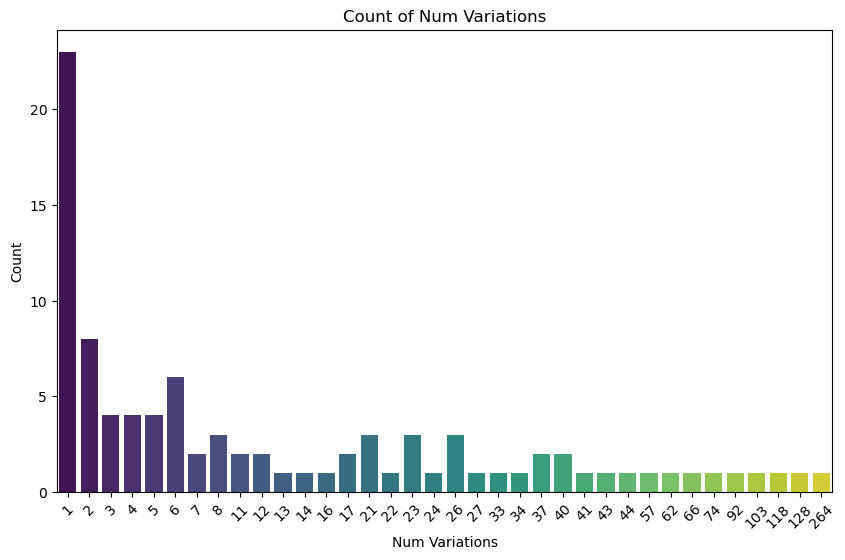

In [2769]:
single_plot_distribution('Num Variations', data)

Count of each category in Avg Num Moves :
Avg Num Moves
7.0     15
4.0     14
6.0      9
1.0      7
11.0     7
9.0      7
8.0      6
3.0      6
5.0      5
2.0      5
10.0     4
13.0     3
12.0     3
14.0     1
15.0     1
Name: count, dtype: int64


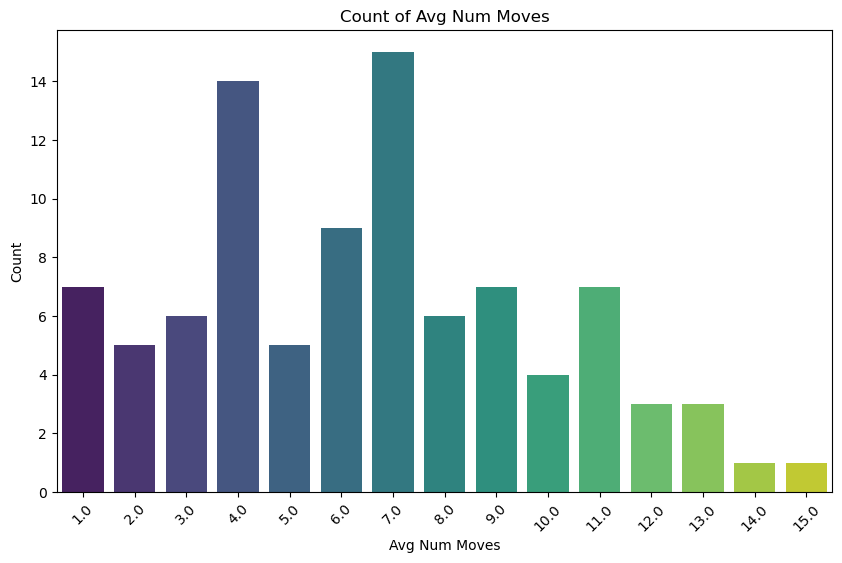

In [2770]:
single_plot_distribution('Avg Num Moves', data)

Count of each category in Player Win % :
Player Win %
32.0    12
36.0     9
40.0     9
38.0     8
31.0     7
34.0     7
33.0     7
35.0     6
37.0     6
39.0     5
29.0     3
28.0     2
43.0     2
41.0     2
45.0     2
47.0     2
44.0     1
22.0     1
26.0     1
30.0     1
Name: count, dtype: int64


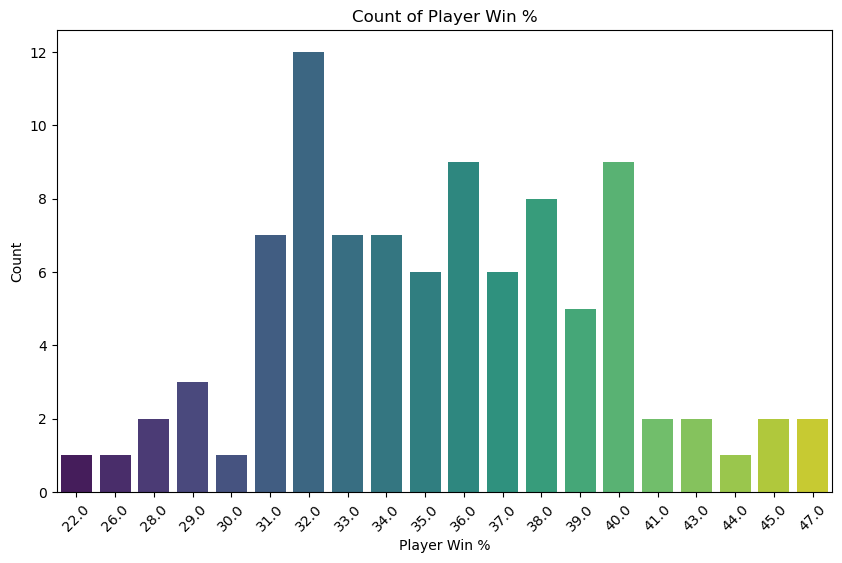

In [2771]:
single_plot_distribution('Player Win %', data)

In [ ]:
single_plot_distribution('Opponent Win %', data)

In [2772]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the data

data['Log Num Games'] = np.log1p(data['Num Games']) 

# List of columns to normalize
columns_to_normalize = ['Perf Rating', 'Player Win %', 'Log Num Games','Avg Player' , 'Opponent Win %', 'Draw %', 'Avg Num Moves', 'Num Variations', 'DeltaPerf']

# Apply Standard scaling
# scaler = StandardScaler()
# data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Apply Min-Max scaling
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Show the head of the DataFrame to verify normalization
print(data.head())


# Reverse the Opponent Win % normalization because a lower opponent win rate is better for the opening
data['Opponent Win %'] = 1 - data['Opponent Win %']

# Reverse the Num Moves normalization because a lower number of moves is better
data['Avg Num Moves'] = 1 - data['Avg Num Moves']

# Reverse the Num Variations normalization because a lower number of variations is better
data['Num Variations'] = 1 - data['Num Variations']

print(data.head(5))

# Save the normalized DataFrame to a new CSV file
data.to_csv('archive/normalized_data.csv', index=False)

# In normalized_data, remove the columns that are not normalized
data = pd.read_csv('archive/normalized_data.csv')

        Opening Name  Num Games  Perf Rating  Avg Player  Player Win %  \
0   Alekhine Defense      34710     0.678571    0.637450          0.56   
1  Anderssen Opening       1308     0.511905    0.474104          0.56   
2       Benko Gambit      24543     0.751984    0.679283          0.72   
3     Benoni Defense      56840     0.789683    0.752988          0.64   
4       Bird Opening      16315     0.430556    0.408367          0.68   

   Draw %  Opponent Win %  Avg Num Moves  Num Variations  DeltaPerf  \
0    0.48         0.43750       0.500000        0.098859   0.554140   
1    0.44         0.50000       0.000000        0.000000   0.541401   
2    0.40         0.37500       0.714286        0.060837   0.656051   
3    0.44         0.40625       0.714286        0.148289   0.541401   
4    0.32         0.46875       0.214286        0.015209   0.490446   

   Log Num Games  
0       0.655656  
1       0.286399  
2       0.616611  
3       0.711217  
4       0.570612  
        Openin

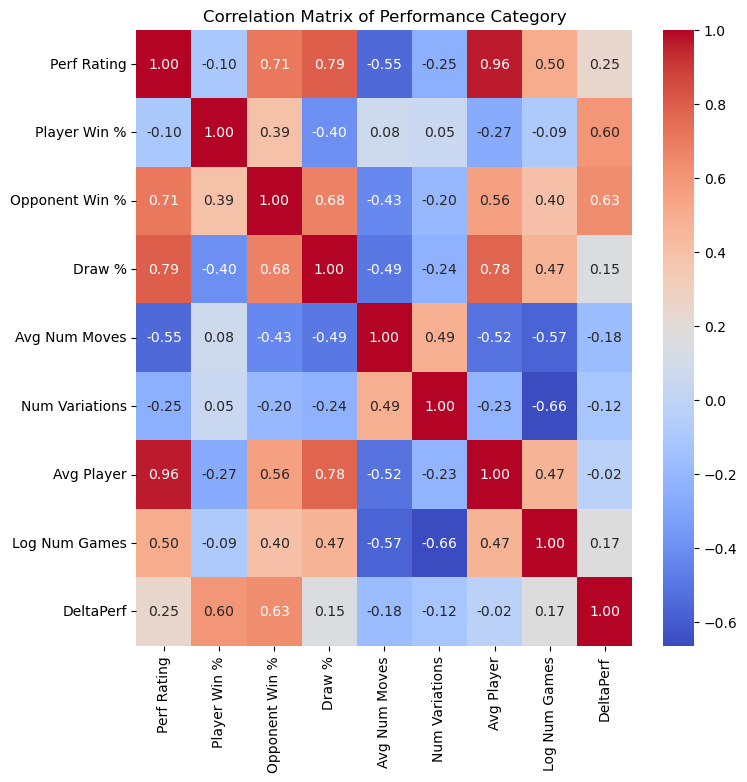

In [2773]:
# scatter plot on the variables from the performance category

import seaborn as sns
import matplotlib.pyplot as plt

# Select the normalized columns
normalizes_data = data[['Perf Rating', 'Player Win %', 'Opponent Win %', 'Draw %', 'Avg Num Moves', 'Num Variations', 'Avg Player', 'Log Num Games', 'DeltaPerf']]

# Calculate the correlation matrix
corr_matrix = normalizes_data.corr()

# Plot the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Performance Category')
plt.show()




PearsonRResult(statistic=0.9637239788185545, pvalue=5.429630151923931e-54)


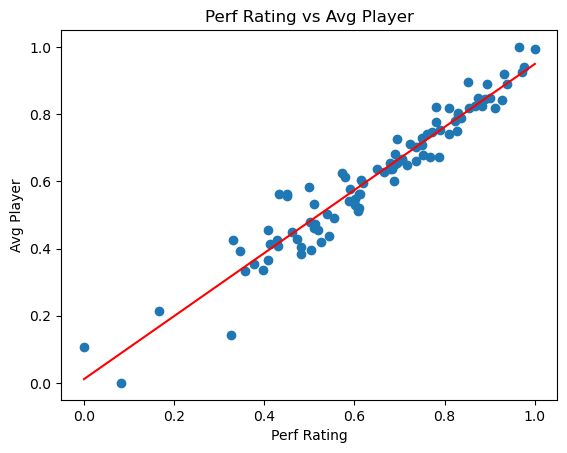

In [2774]:
import numpy as np
from scipy.stats import pearsonr


plt.title("Perf Rating vs Avg Player")
plt.scatter(data['Perf Rating'], data['Avg Player'])
plt.xlabel('Perf Rating')
plt.ylabel('Avg Player')
plt.plot(np.unique(data['Perf Rating']), np.poly1d(np.polyfit(data['Perf Rating'], data['Avg Player'], 1))(np.unique(data['Perf Rating'])), color='red')

# Calculate the Pearson correlation coefficient
corr = pearsonr(data['Perf Rating'], data['Avg Player'])
print(corr)

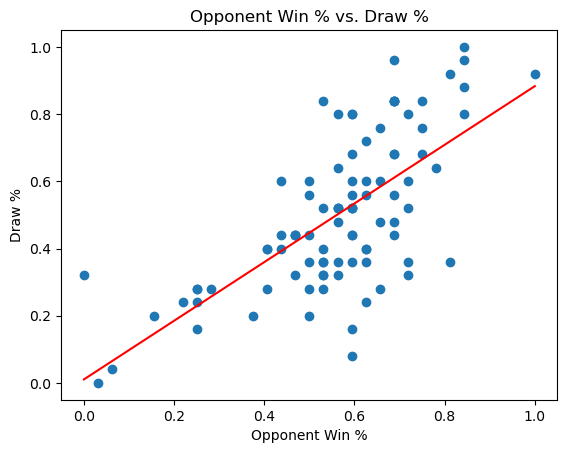

In [2775]:
plt.title("Opponent Win % vs. Draw %")
plt.xlabel("Opponent Win %")
plt.ylabel("Draw %")
plt.scatter(data['Opponent Win %'], data['Draw %'])
plt.plot(np.unique(data['Opponent Win %']), np.poly1d(np.polyfit(data['Opponent Win %'], data['Draw %'], 1))(np.unique(data['Opponent Win %'])), color='red')


In [2776]:
corr = pearsonr(data['Opponent Win %'], data['Draw %'])
print(corr)

PearsonRResult(statistic=0.6810766000663936, pvalue=5.817675071124944e-14)


In [2777]:
coor = pearsonr(data['DeltaPerf'], data['Draw %'])
print(coor)


PearsonRResult(statistic=0.15075480099043514, pvalue=0.14918339875153627)


PearsonRResult(statistic=-0.4016984580204248, pvalue=6.582121431480686e-05)


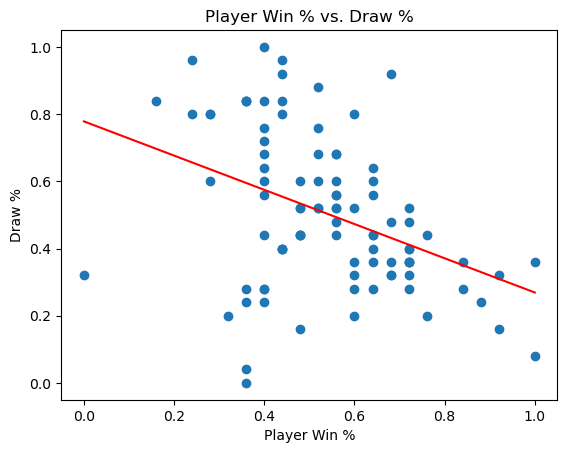

In [2778]:
plt.title("Player Win % vs. Draw %")
plt.xlabel("Player Win %")
plt.ylabel("Draw %")
plt.scatter(data['Player Win %'], data['Draw %'])
plt.plot(np.unique(data['Player Win %']), np.poly1d(np.polyfit(data['Player Win %'], data['Draw %'], 1))(np.unique(data['Player Win %'])), color='red')

coor = pearsonr(data['Player Win %'], data['Draw %'])
print(coor)

PearsonRResult(statistic=0.3924268427527624, pvalue=0.00010003094742932919)


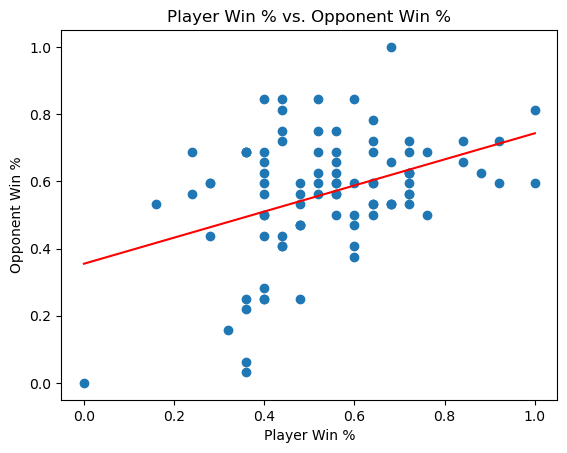

In [2779]:
plt.title("Player Win % vs. Opponent Win %")
plt.xlabel("Player Win %")
plt.ylabel("Opponent Win %")
plt.scatter(data['Player Win %'], data['Opponent Win %'])
plt.plot(np.unique(data['Player Win %']), np.poly1d(np.polyfit(data['Player Win %'], data['Opponent Win %'], 1))(np.unique(data['Player Win %'])), color='red')

corr = pearsonr(data['Player Win %'], data['Opponent Win %'])
print(corr)

In [2780]:
import statsmodels.api as sm

model = sm.OLS(data['Perf Rating'], sm.add_constant(data[['Opponent Win %', 'Draw %']]))
result = model.fit()
print(result.summary())

# Standard error
print(result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:            Perf Rating   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     96.70
Date:                Sun, 05 May 2024   Prob (F-statistic):           3.83e-23
Time:                        19:27:12   Log-Likelihood:                 70.188
No. Observations:                  93   AIC:                            -134.4
Df Residuals:                      90   BIC:                            -126.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1857      0.040      4.

In [2781]:
model = sm.OLS(data['Player Win %'], sm.add_constant(data['Opponent Win %']))
result = model.fit()
print(result.summary())

# Sstandard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:           Player Win %   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     16.56
Date:                Sun, 05 May 2024   Prob (F-statistic):           0.000100
Time:                        19:27:12   Log-Likelihood:                 35.094
No. Observations:                  93   AIC:                            -66.19
Df Residuals:                      91   BIC:                            -61.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3163      0.058      5.

In [2782]:
# multiple regression analysis

model = sm.OLS(data['Player Win %'], sm.add_constant(data[['Draw %', 'Opponent Win %']]))
result = model.fit()
print(result.summary())

# Standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:           Player Win %   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3944.
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.27e-88
Time:                        19:27:13   Log-Likelihood:                 235.85
No. Observations:                  93   AIC:                            -465.7
Df Residuals:                      90   BIC:                            -458.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3267      0.007     48.

PearsonRResult(statistic=0.4923356627859448, pvalue=5.371225182027608e-07)


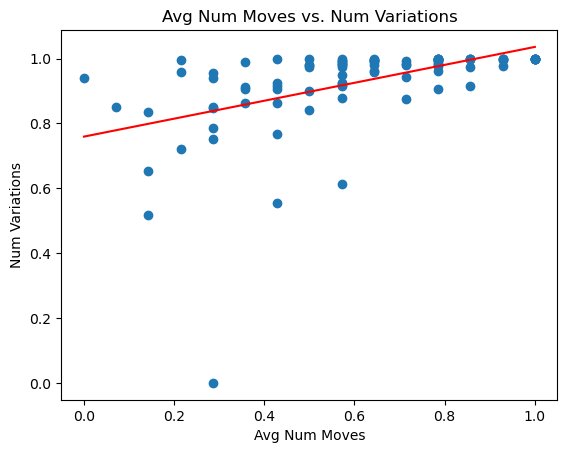

In [2783]:
plt.title("Avg Num Moves vs. Num Variations")
plt.xlabel("Avg Num Moves")
plt.ylabel("Num Variations")
plt.scatter(data['Avg Num Moves'], data['Num Variations'])
plt.plot(np.unique(data['Avg Num Moves']), np.poly1d(np.polyfit(data['Avg Num Moves'], data['Num Variations'], 1))(np.unique(data['Avg Num Moves'])), color='red')

coor = pearsonr(data['Avg Num Moves'], data['Num Variations'])
print(coor)

PearsonRResult(statistic=0.582527904305321, pvalue=1.711088870156371e-09)


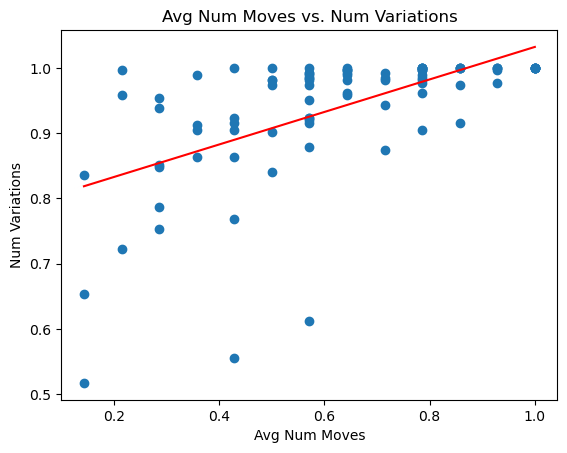

In [2784]:
# Remove outlier data points
data = data[(data['Avg Num Moves'] > 0.1) & (data['Num Variations'] > 0.1)]

# Calculate the correlation between 'Avg Num Moves' and 'Num Variations'
corr = pearsonr(data['Avg Num Moves'], data['Num Variations'])
print(corr)

plt.title("Avg Num Moves vs. Num Variations")
plt.xlabel("Avg Num Moves")
plt.ylabel("Num Variations")
plt.scatter(data['Avg Num Moves'], data['Num Variations'])
plt.plot(np.unique(data['Avg Num Moves']), np.poly1d(np.polyfit(data['Avg Num Moves'], data['Num Variations'], 1))(np.unique(data['Avg Num Moves'])), color='red')

In [2785]:
# Avg Num Moves and Num Variations are not higly correlated and the p-value is very significant, we will use this two variable to create a sub-indicator "Complexity"

# Calculate the complexity of the opening
weight = 0.5
data['Complexity'] = weight * data['Avg Num Moves'] + weight * data['Num Variations']

In [2786]:
# Calculate the Effectivness indicator of the opening
weight = {'Player Win %': 0.5, 'Opponent Win %': 0.3, 'Draw %': 0.2}
data['Effectivness'] = 0
for column in weight.keys():
    data['Effectivness'] += weight[column] * data[column]

In [2787]:
# Add the popularity index
data['Popularity'] = data['Log Num Games']

# Add Improvement Index
data['Improvement'] = data['DeltaPerf']

In [2788]:
#drop the columns that are not needed
data.drop(columns=['Num Games', 'Perf Rating', 'Player Win %', 'Draw %', 'Opponent Win %', 'Avg Num Moves', 'Num Variations', 'DeltaPerf', 'Avg Player', 'Log Num Games'], inplace=True)

# save The Three indicators to a new CSV file
data.to_csv('archive/indicators.csv', index=False)

Text(0.5, 1.0, 'Correlation Matrix of the four Indicators')

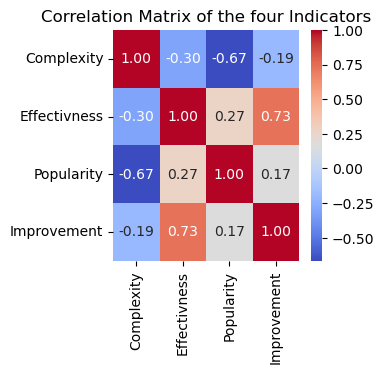

In [2789]:
# Multivariate analysis with the three indicators

data = pd.read_csv('archive/indicators.csv')

# Columns for the multivariate analysis
multivariate_data = data[['Complexity', 'Effectivness', 'Popularity', 'Improvement']]

# Correlation matrix
corr_matrix = multivariate_data.corr()

# Heatmap
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of the four Indicators')






PearsonRResult(statistic=-0.3026965332934616, pvalue=0.0037334445523924727)


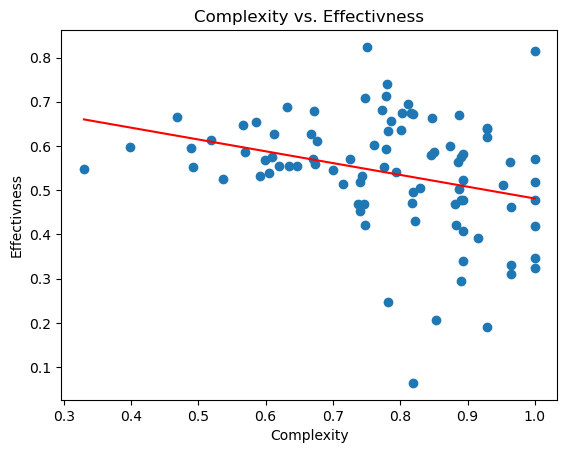

In [2790]:
plt.title("Complexity vs. Effectivness")
plt.xlabel("Complexity")
plt.ylabel("Effectivness")
plt.scatter(data['Complexity'], data['Effectivness'])
plt.plot(np.unique(data['Complexity']), np.poly1d(np.polyfit(data['Complexity'], data['Effectivness'], 1))(np.unique(data['Complexity'])), color='red') 

# Calculate the correlation between 'Complexity' and 'Effectivness'
corr = pearsonr(data['Complexity'], data['Effectivness'])
print(corr)

PearsonRResult(statistic=-0.6671983577102583, pvalue=6.950026192485742e-13)


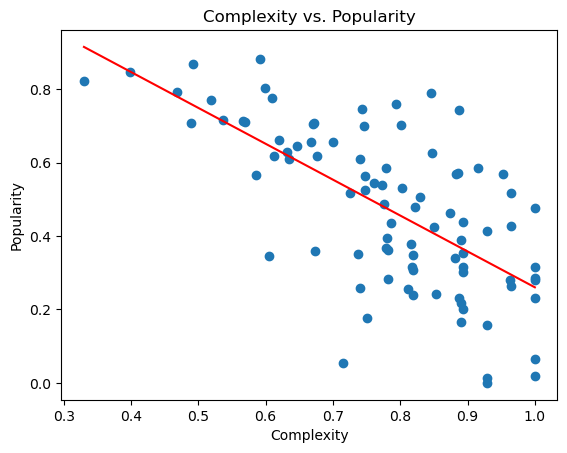

In [2791]:
plt.title("Complexity vs. Popularity")
plt.xlabel("Complexity")
plt.ylabel("Popularity")
plt.scatter(data['Complexity'], data['Popularity'])
plt.plot(np.unique(data['Complexity']), np.poly1d(np.polyfit(data['Complexity'], data['Popularity'], 1))(np.unique(data['Complexity'])), color='red')

# Calculate the correlation between 'Complexity' and 'Popularity'
corr = pearsonr(data['Complexity'], data['Popularity'])
print(corr)

PearsonRResult(statistic=-0.19406761860724492, pvalue=0.06682960371202937)


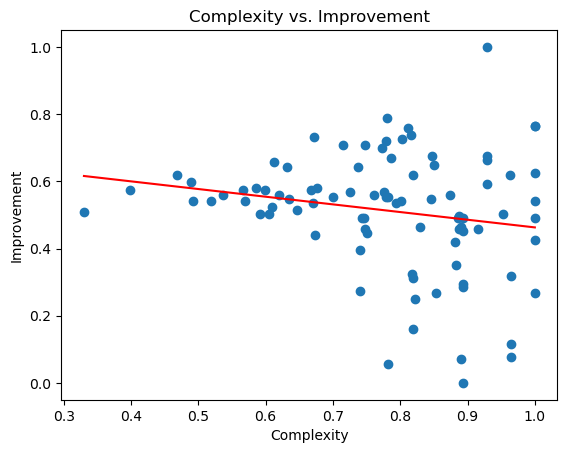

In [2792]:
plt.title("Complexity vs. Improvement")
plt.xlabel("Complexity")
plt.ylabel("Improvement")
plt.scatter(data['Complexity'], data['Improvement'])
plt.plot(np.unique(data['Complexity']), np.poly1d(np.polyfit(data['Complexity'], data['Improvement'], 1))(np.unique(data['Complexity'])), color='red')

# Calculate the correlation between 'Complexity' and 'Improvement'
corr = pearsonr(data['Complexity'], data['Improvement'])
print(corr)

PearsonRResult(statistic=0.269459019477705, pvalue=0.010220718793235783)


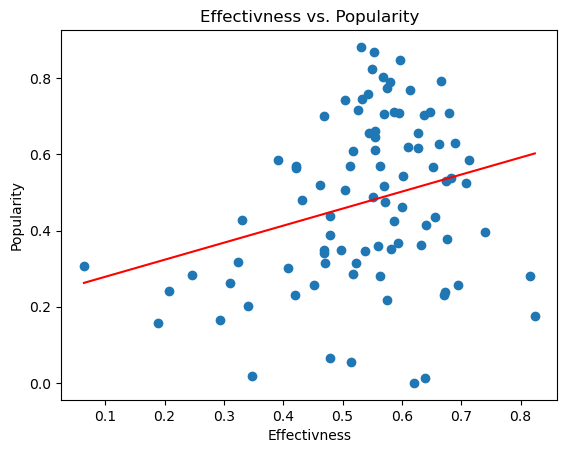

In [2793]:
plt.title("Effectivness vs. Popularity")
plt.xlabel("Effectivness")
plt.ylabel("Popularity")
plt.scatter(data['Effectivness'], data['Popularity'])
plt.plot(np.unique(data['Effectivness']), np.poly1d(np.polyfit(data['Effectivness'], data['Popularity'], 1))(np.unique(data['Effectivness'])), color='red')

# Calculate the correlation between 'Effectivness' and 'Popularity'
corr = pearsonr(data['Effectivness'], data['Popularity'])
print(corr)

PearsonRResult(statistic=0.7282581441195518, pvalue=4.1655376091511237e-16)


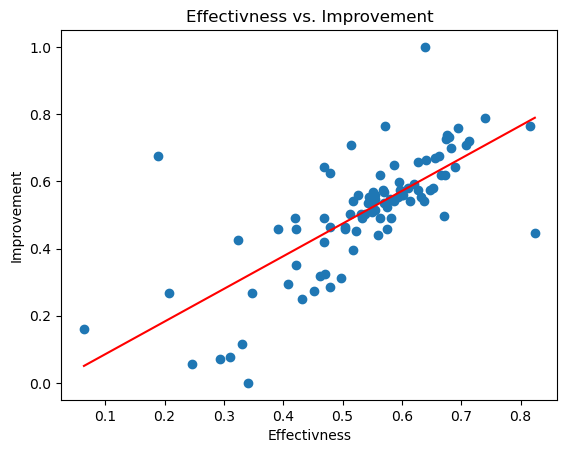

In [2794]:
plt.title("Effectivness vs. Improvement")
plt.xlabel("Effectivness")
plt.ylabel("Improvement")
plt.scatter(data['Effectivness'], data['Improvement'])
plt.plot(np.unique(data['Effectivness']), np.poly1d(np.polyfit(data['Effectivness'], data['Improvement'], 1))(np.unique(data['Effectivness'])), color='red')

# Calculate the correlation between 'Effectivness' and 'Improvement'
corr = pearsonr(data['Effectivness'], data['Improvement'])
print(corr)

In [2795]:
# Multiple regression analysis

model = sm.OLS(data['Effectivness'], sm.add_constant(data[['Complexity', 'Popularity', 'Improvement']]))
result = model.fit()
print(result.summary())

# Standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:           Effectivness   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     36.52
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.57e-15
Time:                        19:27:16   Log-Likelihood:                 91.841
No. Observations:                  90   AIC:                            -175.7
Df Residuals:                      86   BIC:                            -165.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3361      0.094      3.588      

In [2796]:
# Remove improvement

data.drop(columns=['Improvement'], inplace=True)

# Create the Overall index
weight = {'Complexity': 0.1, 'Effectivness': 0.1, 'Popularity': 0.8}
weight_beginer = {'Complexity': 0.6, 'Effectivness': 0.2, 'Popularity': 0.2}
weight_advanced = {'Complexity': 0.2, 'Effectivness': 0.5, 'Popularity': 0.3}

data['Overall'] = 0
for column in weight.keys():
    data['Overall'] += weight[column] * data[column]

data['OverallBeginer'] = 0
for column in weight_beginer.keys():
    data['OverallBeginer'] += weight_beginer[column] * data[column]

data['OverallAdvanced'] = 0
for column in weight_advanced.keys():
    data['OverallAdvanced'] += weight_advanced[column] * data[column]



# Save the final data to a new CSV file
data.to_csv('archive/final_data.csv', index=False)

# Display the 5 best openings based on the Overall index
print(data.sort_values(by='Overall', ascending=False).head(5))

# save the top 10 openings to a new CSV file
data.sort_values(by='Overall', ascending=False).head(10).to_csv('archive/top10_openings.csv', index=False)



             Opening Name  Complexity  Effectivness  Popularity   Overall  \
20        English Opening    0.591798      0.531500    0.882125  0.818030   
24         French Defense    0.491852      0.552750    0.867749  0.798660   
38  King's Indian Defense    0.398425      0.596875    0.847419  0.777465   
30            Indian Game    0.845329      0.579500    0.790165  0.774615   
10      Caro-Kann Defense    0.598316      0.567500    0.803591  0.759454   

    OverallBeginer  OverallAdvanced  
20        0.637804         0.648747  
24        0.579211         0.635070  
38        0.527914         0.632348  
30        0.781130         0.695865  
10        0.633208         0.644490  


In [2797]:
# Display the 5 best openings based on the Overall index for beginer
print(data.sort_values(by='OverallBeginer', ascending=False).head(5))

           Opening Name  Complexity  Effectivness  Popularity   Overall  \
65   Queen Pawn Opening    1.000000      0.815750    0.279661  0.405304   
40  King's Pawn Opening    1.000000      0.571375    0.475938  0.537888   
51  Nimzo-Larsen Attack    0.952879      0.512750    0.569356  0.602047   
89    Zukertort Opening    0.886746      0.503375    0.743797  0.734049   
30          Indian Game    0.845329      0.579500    0.790165  0.774615   

    OverallBeginer  OverallAdvanced  
65        0.819082         0.691773  
40        0.809463         0.628469  
51        0.788148         0.617757  
89        0.781482         0.652176  
30        0.781130         0.695865  


In [2798]:
# Display the 5 best openings based on the Overall index for advanced
print(data.sort_values(by='OverallAdvanced', ascending=False).head(5))

            Opening Name  Complexity  Effectivness  Popularity   Overall  \
30           Indian Game    0.845329      0.579500    0.790165  0.774615   
65    Queen Pawn Opening    1.000000      0.815750    0.279661  0.405304   
37  King's Indian Attack    0.800516      0.637000    0.702177  0.705494   
84     Trompowsky Attack    0.847637      0.662250    0.627318  0.652843   
83          Torre Attack    0.778110      0.713125    0.586265  0.618135   

    OverallBeginer  OverallAdvanced  
30        0.781130         0.695865  
65        0.819082         0.691773  
37        0.748145         0.689256  
84        0.766496         0.688848  
83        0.726744         0.688064  


In [2799]:
from sklearn.cluster import KMeans

# Assuming your data is stored in a CSV file
data = pd.read_csv('archive/final_data.csv')

# Ensure that the index is appropriately named; this example assumes the column is named 'Overall Index'
print(df.head())  # Check the first few rows to confirm data is loaded correctly


                                             Opening Colour  Num Games  \
0                 Alekhine Defense, Balogh Variation  white        692   
1               Alekhine Defense, Brooklyn Variation  black        228   
2               Alekhine Defense, Exchange Variation  white       6485   
3                Alekhine Defense, Four Pawns Attack  white        881   
4  Alekhine Defense, Four Pawns Attack, Fianchett...  black        259   

   Perf Rating  Avg Player  Player Win %  Draw %  Opponent Win %  Num Moves  \
0         2247        2225          40.8    24.3            35.0          7   
1         2145        2193          29.8    22.4            47.8          4   
2         2244        2194          40.8    27.7            31.5          9   
3         2187        2130          39.7    23.2            37.1          9   
4         2122        2178          37.8    21.2            40.9         10   

       Opening Name                                Variation  
0  Alekhine Defen

/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

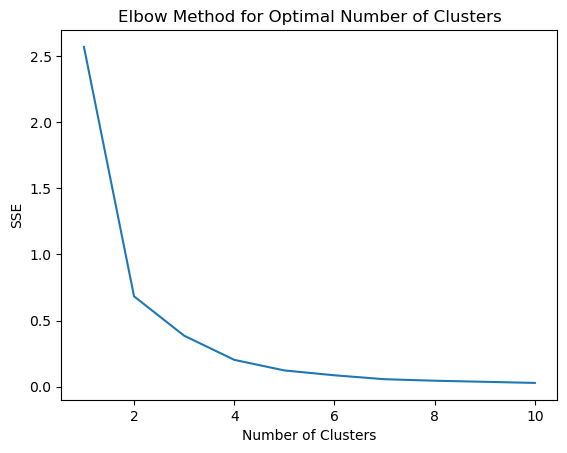

In [2800]:
# Calculate the sum of squared distances for different numbers of clusters (e.g., 1-10)
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Overall']])
    sse[k] = kmeans.inertia_  # Sum of squared distances

# Plot SSE values to find the elbow
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()


In [2801]:
# Replace 'optimal_k' with the number of clusters chosen based on the Elbow method
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Overall']])


/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2802]:
# Examine cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Statistical summary of the index for each cluster
cluster_summary = data.groupby('Cluster')['Overall'].describe()
print(cluster_summary)


Cluster Centers:
[[0.71037068]
 [0.33025436]
 [0.54719964]]
         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0         26.0  0.710371  0.051321  0.635679  0.675861  0.703846  0.744750   
1         34.0  0.330254  0.084134  0.149957  0.298566  0.340215  0.393175   
2         30.0  0.547200  0.054382  0.448040  0.497294  0.561492  0.596374   

              max  
Cluster            
0        0.818030  
1        0.431986  
2        0.623634  


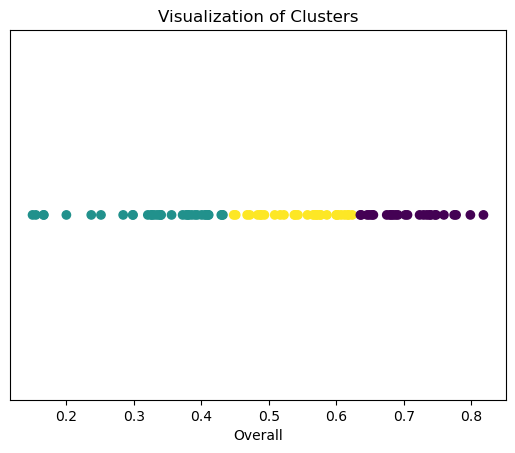

In [2803]:
plt.figure()
plt.scatter(data['Overall'], [0]*len(data), c=data['Cluster'], cmap='viridis')
plt.title("Visualization of Clusters")
plt.xlabel("Overall")
plt.yticks([])  # Hide y-axis as it's not meaningful in this one-dimensional plot
plt.show()


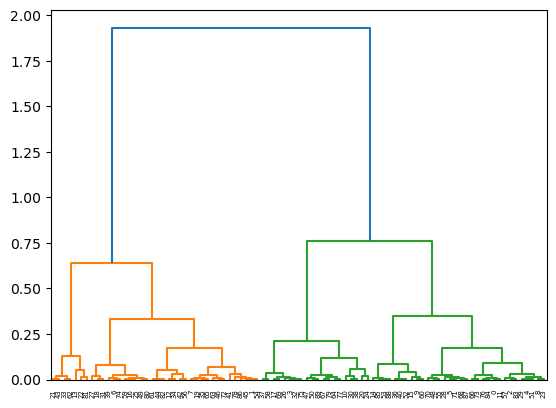

In [2804]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(data[['Overall']], method='ward'))